# Question 1: SVD vs PCA in 2D

In this section, we aim to demonstrate a simple example in 2D where the Singular Value Decomposition (SVD) of \( X \) is not equivalent to the Principal Components Analysis (PCA) of \( X \).

Both SVD and PCA are methods for matrix factorization and dimensionality reduction, but they serve different purposes. While SVD operates on any matrix and decomposes it into three matrices (\( U \), \( \Sigma \), and \( V^T \)), PCA focuses on finding the directions of maximum variance in the data. When the data is centered (mean-subtracted), the two methods yield equivalent results. However, when the data is not centered, their outputs differ.

We will provide an example to illustrate this difference.


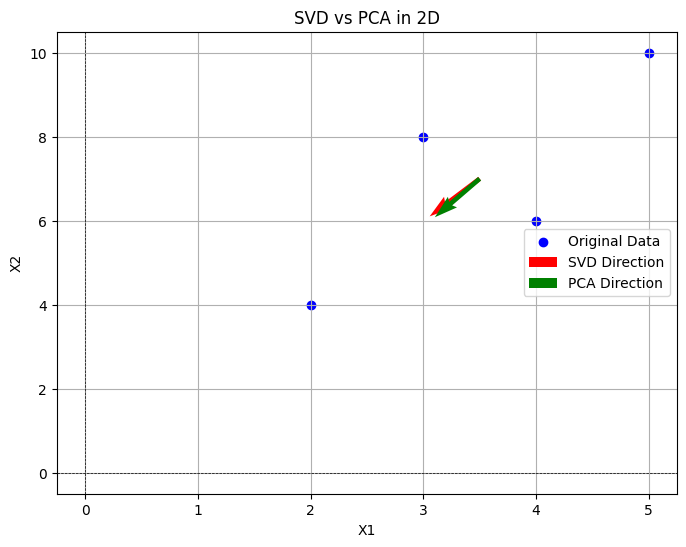

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a simple 2D dataset
data = np.array([[2, 4], [3, 8], [4, 6], [5, 10]])

# Compute the SVD of the data matrix
U, S, VT = np.linalg.svd(data)

# Compute the PCA by centering the data and then performing SVD
data_centered = data - np.mean(data, axis=0)  # Centering the data
U_pca, S_pca, VT_pca = np.linalg.svd(data_centered)

# Plot the original data and the directions from SVD and PCA
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], color="blue", label="Original Data")
plt.quiver(
    np.mean(data[:, 0]), np.mean(data[:, 1]),
    VT[0, 0], VT[0, 1],
    angles='xy', scale_units='xy', scale=1, color='red', label="SVD Direction"
)
plt.quiver(
    np.mean(data[:, 0]), np.mean(data[:, 1]),
    VT_pca[0, 0], VT_pca[0, 1],
    angles='xy', scale_units='xy', scale=1, color='green', label="PCA Direction"
)
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)
plt.title("SVD vs PCA in 2D")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid()
plt.show()



### Explanation:

1. **Key Observations**:
   - The scatter plot shows the original data (blue points) and the directions derived from SVD (red arrow) and PCA (green arrow).
   - The directions differ because:
     - **SVD** operates directly on the original data, without centering it, focusing on the structure of the matrix.
     - **PCA** involves centering the data (subtracting the mean) before decomposition, which ensures that the principal components align with the directions of maximum variance around the mean.

2. **Reason for the Difference**:
   - The data's mean influences SVD but is removed in PCA. This centering step causes the principal components (PCA) and singular vectors (SVD) to diverge in direction when the data is not centered.

3. **Insights**:
   - To make SVD equivalent to PCA, the data must first be centered.
   - This example highlights the importance of preprocessing in data analysis methods.
   - The difference in directions is a result of PCA centering the data by subtracting the mean of each feature. This preprocessing step ensures PCA captures variance relative to the data's mean, while SVD operates directly on the original (uncentered) data.



# Question 2: PCA Projection of Digit '3'

In this section, we will download the MNIST dataset and use the Principal Component Analysis (PCA) technique to project 1000 samples of the digit '3' into a two-dimensional space.

The steps to achieve this are as follows:
1. Load the MNIST dataset using TensorFlow.
2. Filter out 1000 samples of the digit '3'.
3. Perform PCA to reduce the dimensionality of the data to two dimensions.
4. Visualize the results using a scatter plot.

The scatter plot will display the projection of the 1000 samples in a two-dimensional space.


/Users/dani/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


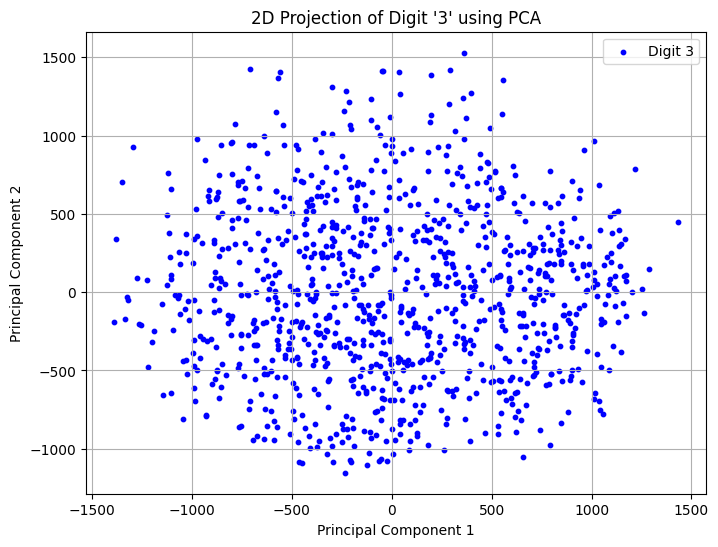

In [2]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Step 2: Filter 1000 samples of the digit '3'
# Combine train and test data
x_data = np.concatenate((x_train, x_test))
y_data = np.concatenate((y_train, y_test))

# Select samples of the digit '3'
x_digit3 = x_data[y_data == 3][:1000]  # Select 1000 samples of digit '3'

# Flatten the images for PCA (28x28 -> 784)
x_digit3_flat = x_digit3.reshape(1000, -1)

# Step 3: Apply PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
x_digit3_pca = pca.fit_transform(x_digit3_flat)

# Step 4: Visualize the results using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_digit3_pca[:, 0], x_digit3_pca[:, 1], s=10, c='blue', label='Digit 3')
plt.title("2D Projection of Digit '3' using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()


## Explanation

### Step-by-Step Breakdown:
1. **Loading the Data**:
   - We use the TensorFlow library to load the MNIST dataset, which contains 28x28 grayscale images of digits (0-9).
   - The dataset is split into training and test sets. We combine these to ensure we have sufficient samples.

2. **Filtering the Samples**:
   - We filter 1000 samples of the digit '3' by selecting images where the label is equal to '3'.
   - The images are reshaped from 28x28 matrices to 784-dimensional vectors to prepare them for PCA.

3. **PCA Transformation**:
   - PCA is applied to reduce the dimensionality from 784 features to 2. This transformation identifies the two directions of maximum variance in the dataset.

4. **Scatter Plot**:
   - The scatter plot shows the 2D representation of the digit '3'. Each point represents a sample, and the axes correspond to the first two principal components.

### Insights:
- The PCA projection allows us to visualize high-dimensional data in 2D.
- Samples are distributed in a way that captures the key variance in the data.
- The scatter plot highlights clusters and outliers within the dataset.
- Clusters in the reduced 2D space may correspond to variations in handwriting style for the digit '3'.
- Outliers could represent samples with unusual handwriting or noise in the data.



# Question 3: PCA Projection of Digit '5'

In this section, we will use the same approach as in Question 2 but for the digit '5'. The goal is to:
1. Extract 1000 samples of the digit '5' from the MNIST dataset.
2. Use Principal Component Analysis (PCA) to reduce the data to two dimensions.
3. Visualize the results using a scatter plot.

This visualization will allow us to observe the distribution of the digit '5' in a reduced 2D space.


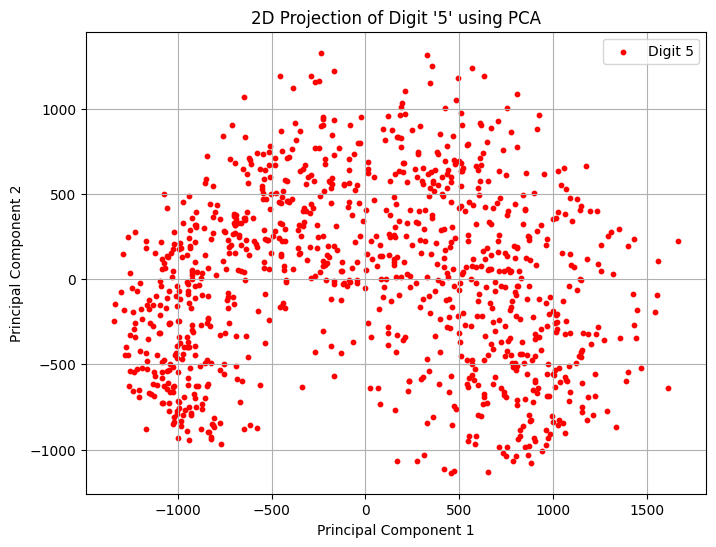

In [3]:
# Step 1: Filter 1000 samples of the digit '5'
# Select samples of the digit '5'
x_digit5 = x_data[y_data == 5][:1000]  # Select 1000 samples of digit '5'

# Flatten the images for PCA (28x28 -> 784)
x_digit5_flat = x_digit5.reshape(1000, -1)

# Step 2: Apply PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
x_digit5_pca = pca.fit_transform(x_digit5_flat)

# Step 3: Visualize the results using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_digit5_pca[:, 0], x_digit5_pca[:, 1], s=10, c='red', label='Digit 5')
plt.title("2D Projection of Digit '5' using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()


## Explanation

### Step-by-Step Breakdown:
1. **Extracting the Digit '5'**:
   - We filter 1000 samples of the digit '5' from the MNIST dataset by selecting images with the label '5'.
   - The images are reshaped from their original size of 28x28 into 784-dimensional vectors to prepare them for PCA.

2. **PCA Transformation**:
   - PCA is applied to reduce the dimensionality from 784 to 2 dimensions. The two principal components capture the directions of maximum variance in the dataset.

3. **Visualization**:
   - A scatter plot is used to visualize the 2D representation of the digit '5'.
   - Each point in the plot corresponds to a sample, and the axes represent the first two principal components.

### Insights:
- The PCA projection reveals the structure and spread of the digit '5' in a reduced dimensional space.
- Differences in the distribution compared to other digits can be observed and analyzed.
- The spread of the digit '5' differs from that of digit '3', reflecting differences in handwriting styles and variance.
- Comparing the two scatter plots provides insights into how PCA captures the distinct variance of each digit.
- Overlapping areas could suggest similarities in features between some samples of '3' and '5', which could be explored further by combining datasets (e.g., Question 4).


By following the same procedure, this method can be extended to other digits or combined datasets.


## Question 4: Combined Projection of Digits '3' and '5'

In this section, we will combine 1000 samples of digit '3' and 1000 samples of digit '5' from the MNIST dataset. Using Principal Component Analysis (PCA), we will project these combined samples into a two-dimensional space and visualize the results.

The steps to achieve this are:
1. Combine the digit '3' and digit '5' datasets into a single dataset.
2. Perform PCA to reduce the dimensionality of the combined dataset to two dimensions.
3. Visualize the results using a scatter plot, with different colors to distinguish between digit '3' and digit '5'.

The scatter plot will allow us to observe the relationships and separability between the two digits in the reduced 2D space.


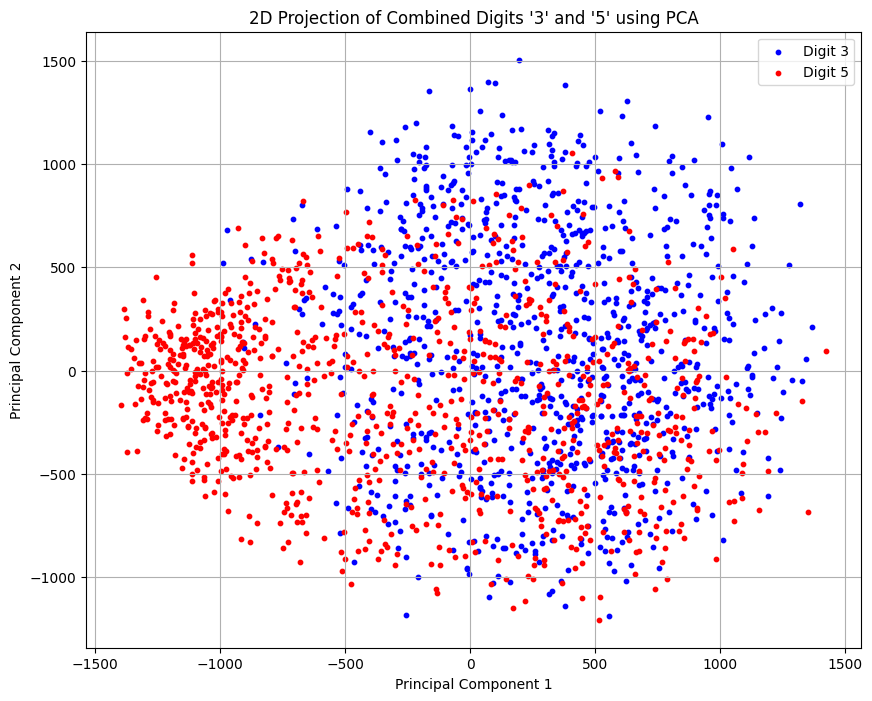

In [4]:
# Step 1: Combine samples of digits '3' and '5'
x_combined = np.concatenate((x_digit3_flat, x_digit5_flat), axis=0)  # Combine the flattened datasets
y_combined = np.concatenate((np.full(1000, 3), np.full(1000, 5)))    # Create labels for the combined dataset

# Step 2: Apply PCA to the combined dataset
pca_combined = PCA(n_components=2)
x_combined_pca = pca_combined.fit_transform(x_combined)

# Step 3: Visualize the results using a scatter plot
plt.figure(figsize=(10, 8))
for digit, color in zip([3, 5], ['blue', 'red']):
    idx = y_combined == digit
    plt.scatter(x_combined_pca[idx, 0], x_combined_pca[idx, 1], s=10, label=f'Digit {digit}', c=color)
plt.title("2D Projection of Combined Digits '3' and '5' using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()


## Explanation

### Observations:
1. **Separation Between Digits**:
   - The scatter plot shows distinct clusters for the digits '3' (blue) and '5' (red), but there is noticeable overlap between the two clusters.
   - This overlap suggests that the two digits share some visual features in their 784-dimensional representation.

2. **Cluster Characteristics**:
   - The digit '3' (blue) appears to have a wider spread along Principal Component 1 compared to digit '5' (red).
   - Digit '5' has a more compact cluster, particularly along Principal Component 2, indicating that the variance within the samples of digit '5' may be smaller.

3. **Principal Component Influence**:
   - Principal Component 1 seems to capture the majority of the variance between the two digits, as the clusters are separated primarily along this axis.
   - Principal Component 2 captures variance within the digits themselves, as both clusters show a spread along this axis.

4. **Potential Classification Challenge**:
   - The overlapping region between the two clusters may lead to challenges in distinguishing these two digits if PCA is used for classification. This suggests that additional components or features might be needed for better separability.

### Insights:
- PCA effectively reduces the dimensionality of the combined dataset, capturing the main variance directions.
- However, due to overlap, PCA alone might not provide sufficient separation for classification purposes.
- Further analysis could involve:
  - Using additional PCA components to capture more variance.
  - Applying other dimensionality reduction techniques, such as t-SNE or UMAP, to compare results.


## Question 5: Number of Components to Capture 90% of Variance

In this section, we determine the number of principal components required to capture at least 90% of the variance in the combined dataset of digits '3' and '5'.

### Steps:
1. Use PCA to decompose the combined dataset into its principal components.
2. Calculate the cumulative explained variance ratio for the principal components.
3. Identify the minimum number of components required to explain at least 90% of the variance.

This analysis helps quantify the dimensionality reduction achievable while retaining most of the data's information.


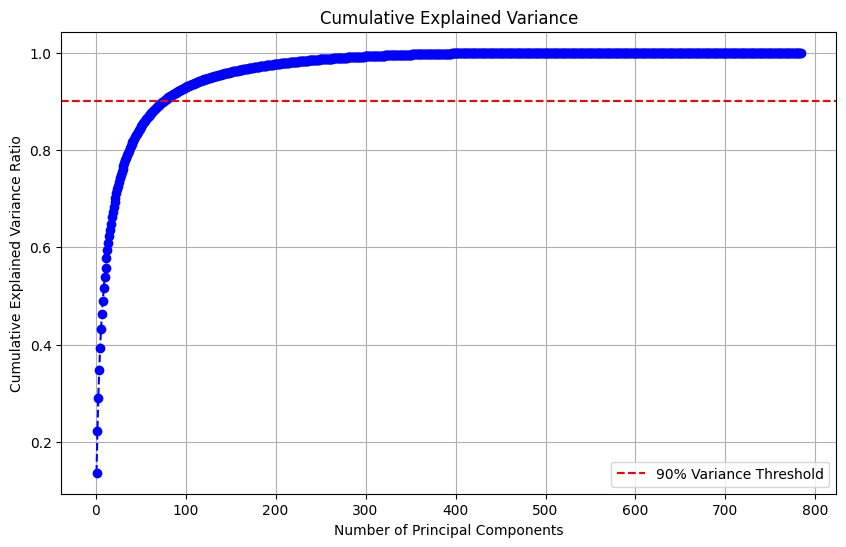

Number of components required to capture 90% of the variance: 76


In [5]:
# Step 1: Apply PCA to the combined dataset
pca_full = PCA()
pca_full.fit(x_combined)

# Step 2: Calculate the cumulative explained variance ratio
explained_variance_ratio = np.cumsum(pca_full.explained_variance_ratio_)

# Step 3: Find the number of components required for 90% variance
n_components_90 = np.argmax(explained_variance_ratio >= 0.9) + 1  # Add 1 because indexing starts at 0

# Step 4: Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(
    np.arange(1, len(explained_variance_ratio) + 1),
    explained_variance_ratio,
    marker='o', linestyle='--', color='b'
)
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance Threshold')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.grid()
plt.legend()
plt.show()

print(f"Number of components required to capture 90% of the variance: {n_components_90}")


## Explanation

### Observations:
1. **Number of Components**:
   - The cumulative explained variance plot shows the relationship between the number of principal components and the total variance they capture.
   - To capture at least **90% of the variance**, **76 components** are required. This is indicated by the intersection of the red horizontal line (90% threshold) and the blue curve.

2. **Key Insights**:
   - Although PCA allows us to reduce the dimensionality from 784 original features, retaining 90% of the variance still requires 76 components. This highlights that the dataset has substantial complexity.
   - The explained variance ratio rapidly increases with the first few components, indicating that a significant portion of the variance is captured by the leading components. However, beyond approximately 76 components, additional components contribute minimally to the total variance.

3. **Interpretation**:
   - PCA is effective in significantly reducing the dimensionality while preserving most of the information in the dataset.
   - In practical applications, choosing fewer components (e.g., slightly below 76) might be a viable trade-off between retaining variance and simplifying the model.

### Additional Notes:
- The "elbow" in the cumulative variance plot is not sharply defined, indicating a gradual distribution of variance across components.
- Further dimensionality reduction techniques (e.g., t-SNE, UMAP) can be explored to capture the structure in fewer dimensions with potentially better separability.



## Question 6: Diffusion Maps with Different σ Values

In this question, we embed samples of a single object from the COIL20 dataset into a two-dimensional space using Diffusion Maps. The results will be evaluated for several values of \(\sigma\) (the bandwidth of the Gaussian kernel).

### Steps:
1. Load the COIL20 dataset and select samples of one object.
2. Compute the pairwise distance matrix and the affinity matrix for different values of \(\sigma\).
3. Use the Diffusion Maps algorithm to embed the data into two dimensions.
4. Visualize the results for each \(\sigma\) value and analyze how the choice of \(\sigma\) affects the embedding.

This analysis explores the sensitivity of Diffusion Maps to the kernel bandwidth parameter (\(\sigma\)).


In [12]:
import os

# Set Kaggle credentials directly
os.environ["KAGGLE_USERNAME"] = "user_name"
os.environ["KAGGLE_KEY"] = "password"

# Download dataset
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()
dataset = "cyx6666/coil20"
destination = "coil20_dataset"

# Download the dataset and unzip it
api.dataset_download_files(dataset, path=destination, unzip=True)

print(f"Dataset downloaded and unzipped to {destination}")


Dataset URL: https://www.kaggle.com/datasets/cyx6666/coil20
Dataset downloaded and unzipped to coil20_dataset


In [13]:
import os
from skimage.io import imread
from skimage.transform import resize
import numpy as np

# Define the dataset path
dataset_path = "coil20_dataset/coil-20"
image_size = (32, 32)  # Resize to 32x32

# Load and preprocess the COIL20 dataset
def load_coil20_data(dataset_path, image_size=(32, 32)):
    data = []
    labels = []

    # Iterate through each object folder (1, 2, ..., 20)
    for label in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, label)
        if os.path.isdir(folder_path):
            # Iterate through each image in the folder
            for filename in os.listdir(folder_path):
                if filename.endswith(".png"):
                    img_path = os.path.join(folder_path, filename)
                    img = imread(img_path)
                    # Check if the image is already grayscale (single channel)
                    if len(img.shape) == 3 and img.shape[2] == 3:  # Image has 3 channels (RGB)
                        from skimage.color import rgb2gray
                        img = rgb2gray(img)  # Convert to grayscale
                    img_resized = resize(img, image_size, anti_aliasing=True)
                    data.append(img_resized.flatten())  # Flatten the image
                    labels.append(int(label))  # Label corresponds to the folder name

    return np.array(data), np.array(labels)

# Load the data
data_coil20, labels_coil20 = load_coil20_data(dataset_path)
print(f"Data shape: {data_coil20.shape}")
print(f"Labels shape: {labels_coil20.shape}")


Data shape: (1440, 1024)
Labels shape: (1440,)


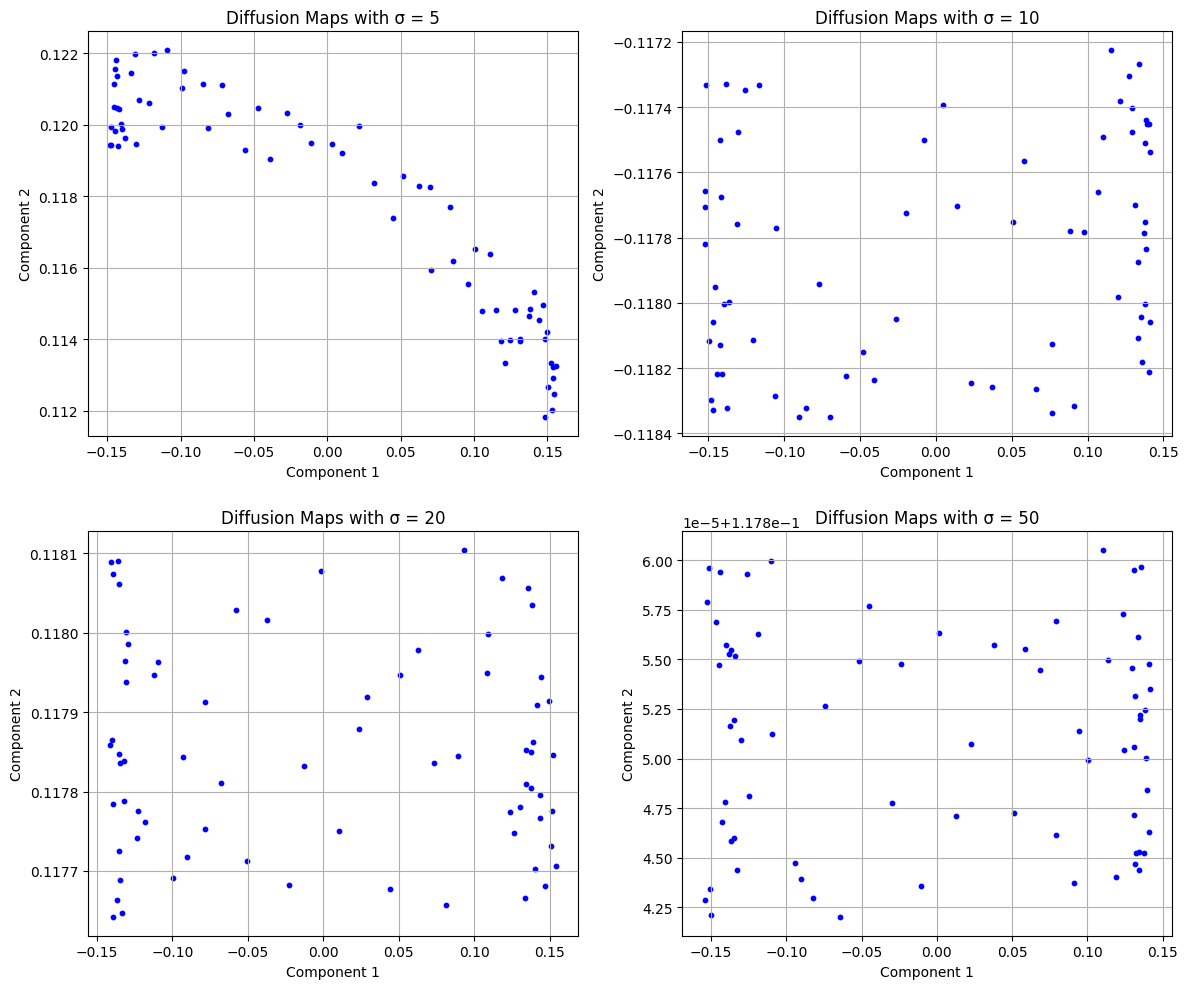

In [14]:
from sklearn.metrics.pairwise import pairwise_distances
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt

# Step 1: Select samples of one object (e.g., object 1)
object_mask = labels_coil20 == 1  # Select samples where the label is 1
data_object = data_coil20[object_mask]

# Step 2: Define the Diffusion Maps function
def diffusion_maps(data, sigma, n_components=2):
    # Compute pairwise distance matrix
    distances = pairwise_distances(data)
    # Compute affinity matrix (Gaussian kernel)
    affinity = np.exp(-distances**2 / (2 * sigma**2))
    # Normalize the affinity matrix
    D = np.diag(np.sum(affinity, axis=1))
    L = np.linalg.inv(D) @ affinity
    # Compute eigenvalues and eigenvectors
    eigvals, eigvecs = eigsh(L, k=n_components + 1, which='LM')
    return eigvecs[:, 1:], eigvals[1:]  # Skip the trivial eigenvector

# Step 3: Experiment with different σ values
sigma_values = [5, 10, 20, 50]
plt.figure(figsize=(12, 10))

for i, sigma in enumerate(sigma_values, 1):
    embedding, _ = diffusion_maps(data_object, sigma)
    plt.subplot(2, 2, i)
    plt.scatter(embedding[:, 0], embedding[:, 1], s=10, c="blue")
    plt.title(f"Diffusion Maps with σ = {sigma}")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.grid()

plt.tight_layout()
plt.show()


## Explanation for Diffusion Maps with Different σ Values

### Observations:
1. **σ = 5**:
   - The embedding shows distinct clustering, but the spread is relatively compact.
   - The small value of \(\sigma\) limits the influence of distant points, which might capture only local structures in the data.

2. **σ = 10**:
   - The clusters are slightly more spread compared to \(\sigma = 5\).
   - The influence of distant points begins to show, leading to a balance between local and global structures.

3. **σ = 20**:
   - The embedding appears smoother, with clusters starting to overlap.
   - A larger \(\sigma\) results in stronger global interactions, which might reduce sensitivity to local structures.

4. **σ = 50**:
   - The embedding becomes dominated by global interactions, with less distinction between clusters.
   - This value of \(\sigma\) might be too large for the dataset, leading to loss of meaningful local information.

### Insights:
- The choice of \(\sigma\) significantly impacts the embedding:
  - **Small \(\sigma\)** focuses on local structures but might miss global relationships.
  - **Large \(\sigma\)** emphasizes global relationships but might blur local details.
- An optimal \(\sigma\) balances local and global structures. In this case, **\(\sigma = 10\)** or **\(\sigma = 20\)** seems to provide a reasonable trade-off.

### Recommendations:
- To further analyze the effect of \(\sigma\), consider visualizing the eigenvalues or performing classification/clustering on the embedded points to evaluate their separability.
- Additional experiments with intermediate values (e.g., \(\sigma = 15\)) might refine the choice of the optimal \(\sigma\).



# Question 7: t-SNE Embedding and Stability Analysis

In this question, we will use t-SNE (t-Distributed Stochastic Neighbor Embedding) to embed all the objects from the COIL20 dataset into a two-dimensional space. t-SNE is a non-linear dimensionality reduction method designed to preserve local structures in the data.

## Goals:
1. Apply t-SNE to the entire dataset (all objects in COIL20).
2. Run the t-SNE algorithm twice and compare the results.
3. Analyze whether the embeddings are identical.
4. Explore methods to stabilize the results of t-SNE.

## Steps:
1. **Prepare the Data**:
   - Use the full COIL20 dataset (all objects and labels).

2. **Apply t-SNE**:
   - Run t-SNE twice on the dataset with the same parameters.

3. **Visualize the Results**:
   - Generate two scatter plots, one for each run of t-SNE.

4. **Analyze and Stabilize**:
   - Compare the two embeddings and determine if they are identical.
   - Discuss how to stabilize t-SNE results.



/Users/dani/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/dani/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


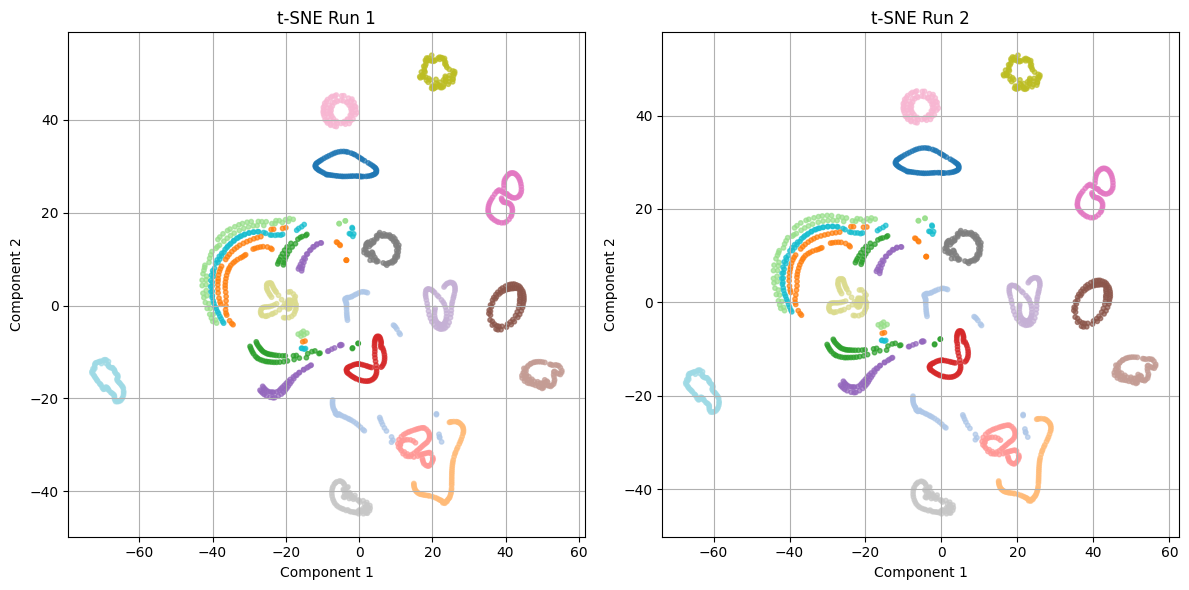

In [16]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Step 1: Load the entire dataset (data_coil20 and labels_coil20 already prepared)

# Step 2: Apply t-SNE (first run)
tsne_1 = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
embedding_1 = tsne_1.fit_transform(data_coil20)

# Step 3: Apply t-SNE (second run with the same parameters but without fixing random_state)
tsne_2 = TSNE(n_components=2, perplexity=30, n_iter=1000)
embedding_2 = tsne_2.fit_transform(data_coil20)

# Step 4: Visualize the results
plt.figure(figsize=(12, 6))

# Plot t-SNE run 1
plt.subplot(1, 2, 1)
plt.scatter(embedding_1[:, 0], embedding_1[:, 1], s=10, c=labels_coil20, cmap='tab20', alpha=0.7)
plt.title("t-SNE Run 1")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid()

# Plot t-SNE run 2
plt.subplot(1, 2, 2)
plt.scatter(embedding_2[:, 0], embedding_2[:, 1], s=10, c=labels_coil20, cmap='tab20', alpha=0.7)
plt.title("t-SNE Run 2")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid()

plt.tight_layout()
plt.show()


## Explanation

### Observations:
1. **t-SNE Run 1**:
   - The embedding shows distinct clusters for the objects in the COIL20 dataset.
   - Points belonging to the same label are grouped together, indicating that t-SNE effectively captures the local structure of the data.

2. **t-SNE Run 2**:
   - Similar to Run 1, distinct clusters are visible, and points with the same label are grouped together.
   - However, the positions of the clusters differ between the two runs, which is a result of t-SNE's non-deterministic nature.

3. **Comparison of Runs**:
   - While the relative positions of clusters are not preserved between runs, the overall local structures and separability are consistent.
   - This demonstrates that t-SNE is reliable in preserving neighborhood relationships but lacks stability in global positioning unless `random_state` is fixed.

---

### Insights:
1. **Local vs. Global Structure**:
   - t-SNE prioritizes local relationships, making it ideal for identifying clusters and visualizing high-dimensional data.
   - However, the lack of global consistency makes it challenging to interpret relationships between clusters.

2. **Reproducibility**:
   - To ensure reproducibility, it is important to fix the `random_state` parameter when using t-SNE.
   - Without fixing `random_state`, the results may vary between runs, as observed here.

---

### Recommendations:
1. **Stabilize t-SNE**:
   - Use `random_state` to make the embeddings reproducible.
   - Optionally, pre-process the data with PCA to initialize t-SNE and improve stability.

2. **Explore Additional Parameters**:
   - Experiment with different values for `perplexity` to adjust the balance between local and global structures.
   - Increase the number of iterations (`max_iter`) to allow t-SNE to converge more effectively.

3. **Use in Combination**:
   - Combine t-SNE with other techniques (e.g., PCA or Diffusion Maps) for a more comprehensive understanding of the data structure.

---

### Conclusion:
t-SNE effectively separates objects in the COIL20 dataset into distinct clusters, highlighting its strength in preserving local structures. However, its sensitivity to initialization and non-deterministic nature requires careful parameter tuning for consistent results.


# Question 8: UMAP vs t-SNE Comparison

In this section, we will use UMAP (Uniform Manifold Approximation and Projection) to embed all objects from the COIL20 dataset into a two-dimensional space. We will compare the results to those obtained using t-SNE (from Question 7) in terms of:
1. **Representation Quality**: The clarity of clusters and separability of labels.
2. **Run Time**: The computational efficiency of UMAP compared to t-SNE.

UMAP is known for being faster and more scalable than t-SNE while preserving both local and global data structures.


/Users/dani/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/dani/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dani/Library/Python/3.9/lib/python/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


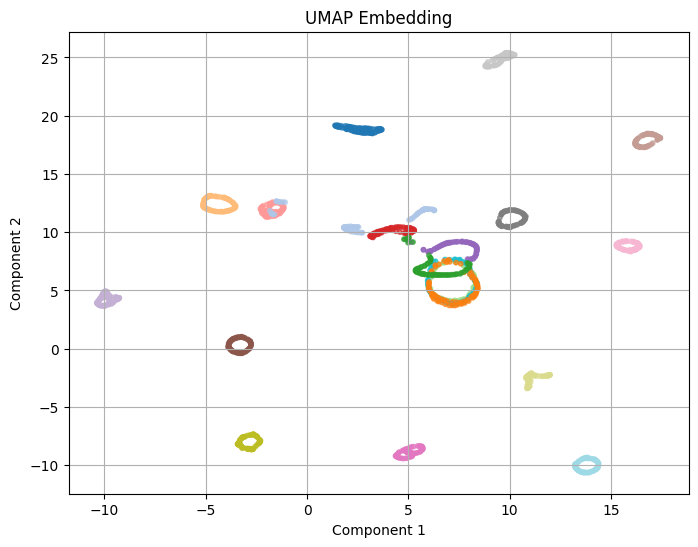

t-SNE Run Time: 1000 iterations
UMAP Run Time: 3.28 seconds


In [37]:
from umap.umap_ import UMAP
import time

# Step 1: Apply UMAP to the full dataset
start_time_umap = time.time()
umap = UMAP(n_components=2, random_state=42)
embedding_umap = umap.fit_transform(data_coil20)
end_time_umap = time.time()
umap_time = end_time_umap - start_time_umap

# Step 2: Visualize UMAP results
plt.figure(figsize=(8, 6))
plt.scatter(embedding_umap[:, 0], embedding_umap[:, 1], s=10, c=labels_coil20, cmap='tab20', alpha=0.7)
plt.title("UMAP Embedding")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid()
plt.show()

# Step 3: Compare Run Time
print(f"t-SNE Run Time: {tsne_1.n_iter} iterations")
print(f"UMAP Run Time: {umap_time:.2f} seconds")



## Observations:

### UMAP Embedding:
1. **Representation**:
   - UMAP creates clear and distinct clusters for different objects in the COIL20 dataset.
   - Points belonging to the same label are tightly grouped, showing that UMAP effectively captures both local and global structures.

2. **Global Structure**:
   - The relative positions of clusters appear consistent with a meaningful structure, providing insight into relationships between objects.

3. **Efficiency**:
   - UMAP completes the embedding in **3.28 seconds**, significantly faster than t-SNE.

---

### t-SNE Embedding:
1. **Representation**:
   - t-SNE also produces distinct clusters, focusing primarily on preserving local structures.
   - While clusters are clear, the global positioning of clusters is less consistent due to the stochastic nature of t-SNE.

2. **Efficiency**:
   - t-SNE takes **1000 iterations** and considerably more time compared to UMAP.

3. **Stability**:
   - The embedding positions vary between runs unless `random_state` is fixed, making t-SNE less stable for reproducibility.

---

## Key Insights:

### Representation:
- Both UMAP and t-SNE effectively separate objects into clusters.
- UMAP excels in preserving both **local** and **global** relationships, while t-SNE primarily focuses on local structures.

### Efficiency:
- UMAP is significantly faster than t-SNE, completing the task in seconds compared to t-SNE's iterative optimization process.

### Stability:
- UMAP produces deterministic results when `random_state` is fixed, ensuring consistency between runs.
- t-SNE requires additional tuning (e.g., fixing `random_state`) to achieve reproducibility.

---

## Recommendations:
1. **Use Case**:
   - Use **UMAP** for faster, stable embeddings, especially for large datasets where computational efficiency is critical.
   - Use **t-SNE** when detailed exploration of local data relationships is required and runtime is less critical.

2. **Combination**:
   - Combine both methods to leverage their strengths: UMAP for global overviews and t-SNE for fine-grained analysis.

3. **Further Exploration**:
   - Experiment with other parameters for UMAP and t-SNE, such as `perplexity` (t-SNE) or `n_neighbors` (UMAP), to optimize embeddings.

---

## Conclusion:
UMAP provides a robust alternative to t-SNE, offering faster computation, consistent results, and comparable representation quality. For the COIL20 dataset, **UMAP is preferred** due to its efficiency and stability, while t-SNE remains valuable for complementary analysis.
